In [1]:
%matplotlib inline

import os
import glob
import json
import re
import matplotlib.pyplot as plt
from IPython.display import display, Markdown



In [2]:
os.system("rm *.json")
os.system("rsync -avrz vnode-03:/home/students/c/h/chmura/tpr/1/*.json .")

0

In [3]:
files = sorted(glob.glob("*.json"))
print(files)

['1_shmem.json', '2_no_shmem.json', '3_same_machine.json', '4_different_machines.json']


# 1_shmem

## Mode:send, Delay: 0.004100799560546875 ms

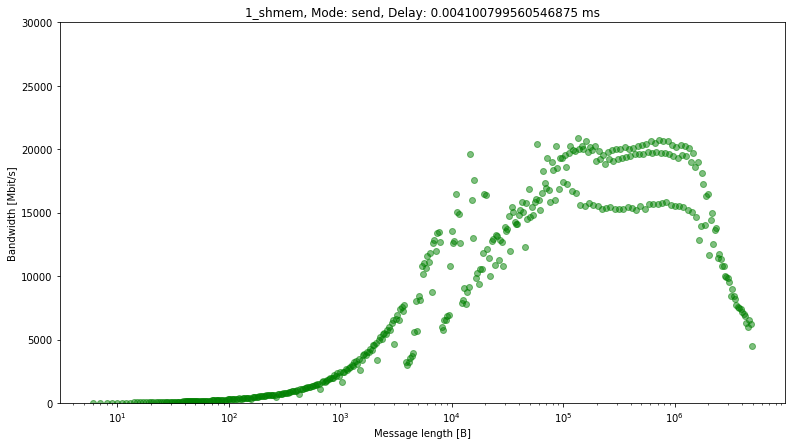

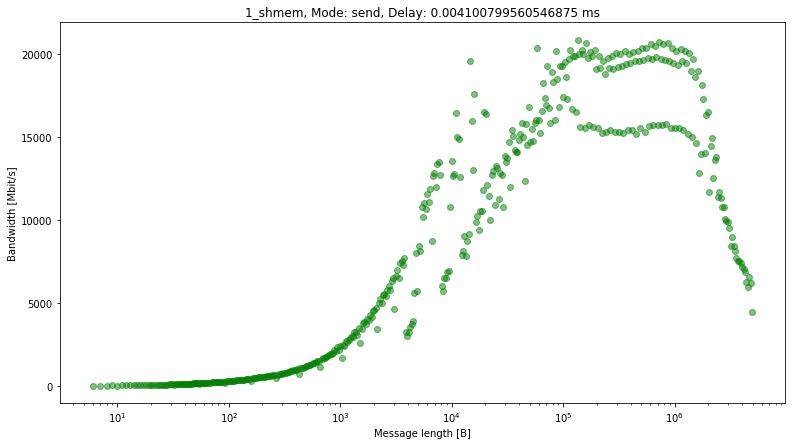

## Mode:ssend, Delay: 0.007855892181396484 ms

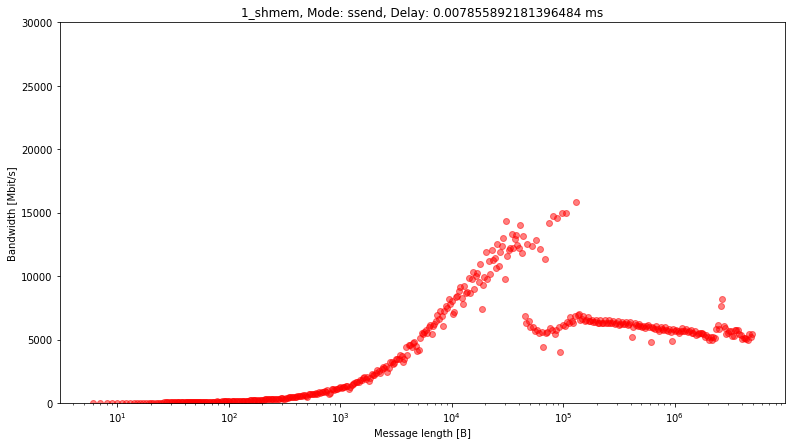

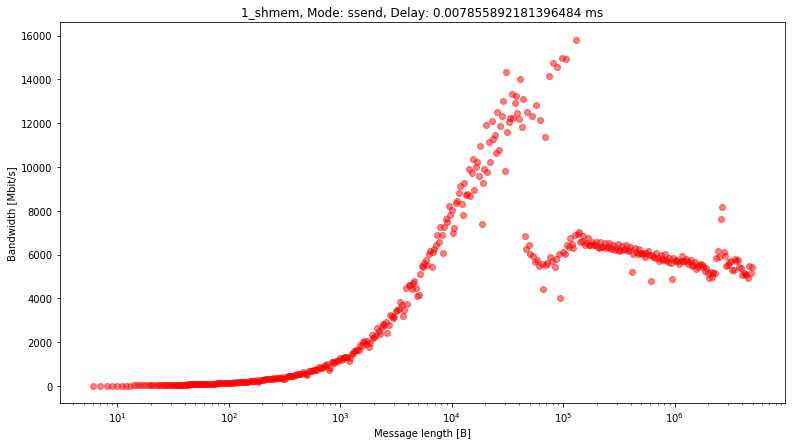

# 2_no_shmem

## Mode:send, Delay: 0.004088878631591797 ms

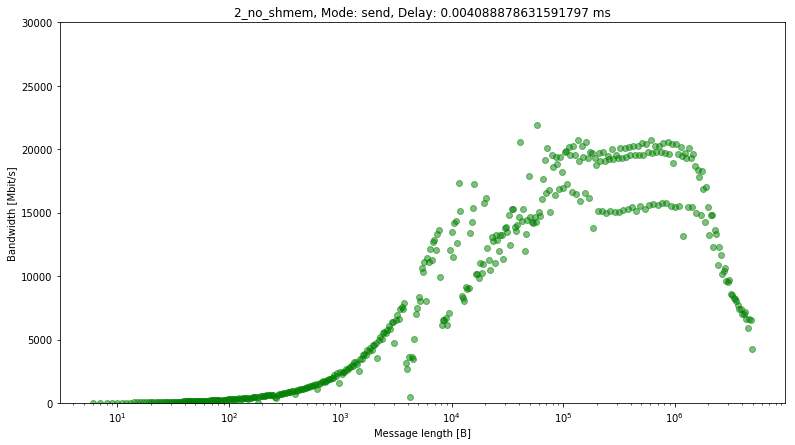

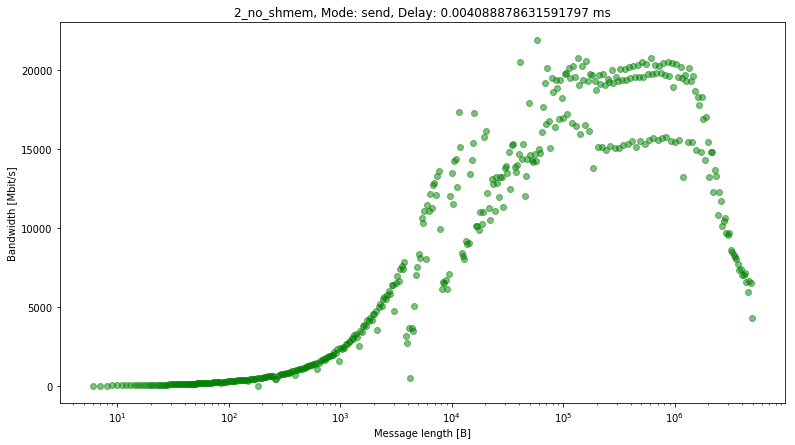

## Mode:ssend, Delay: 0.008845329284667969 ms

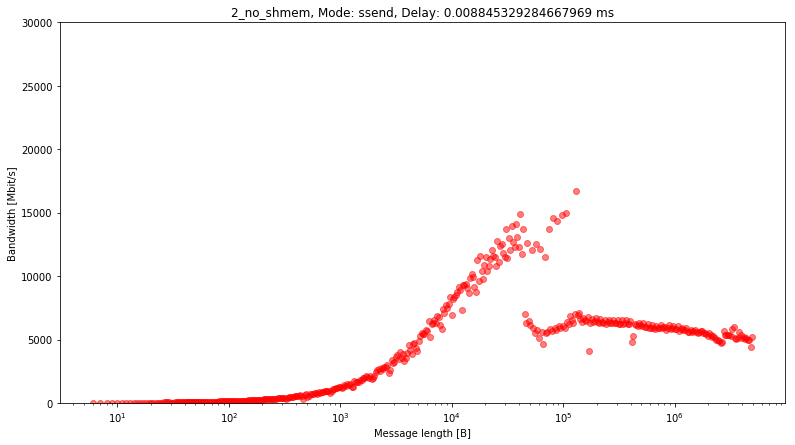

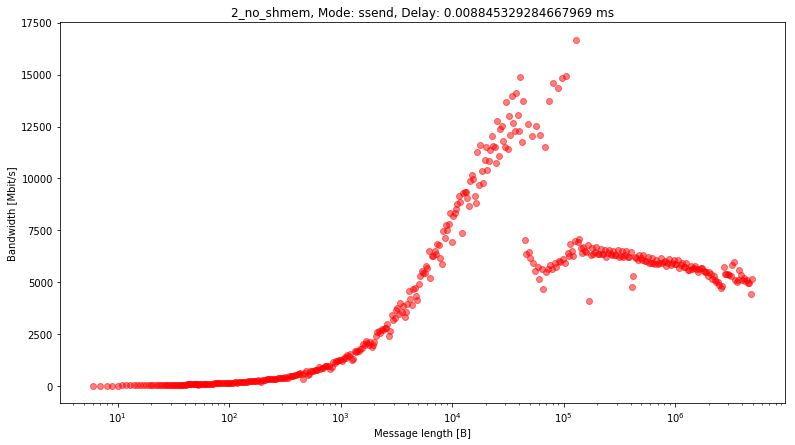

# 3_same_machine

## Mode:send, Delay: 0.010836124420166016 ms

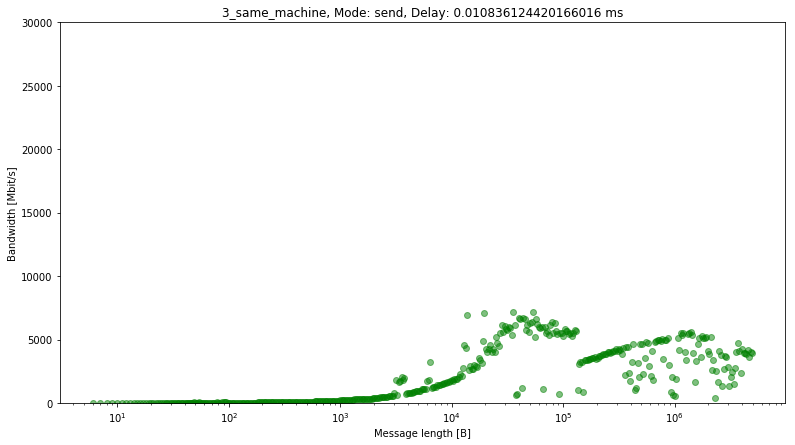

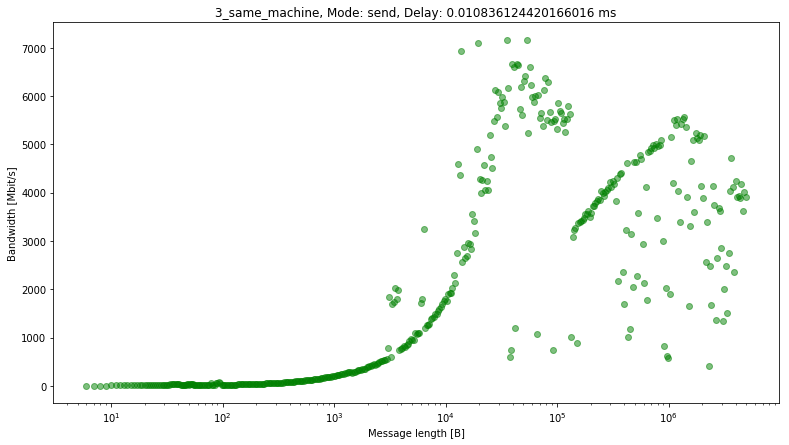

## Mode:ssend, Delay: 0.11636018753051758 ms

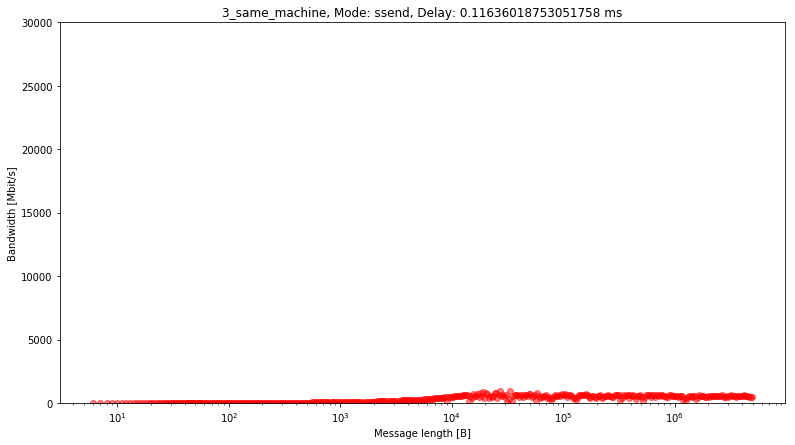

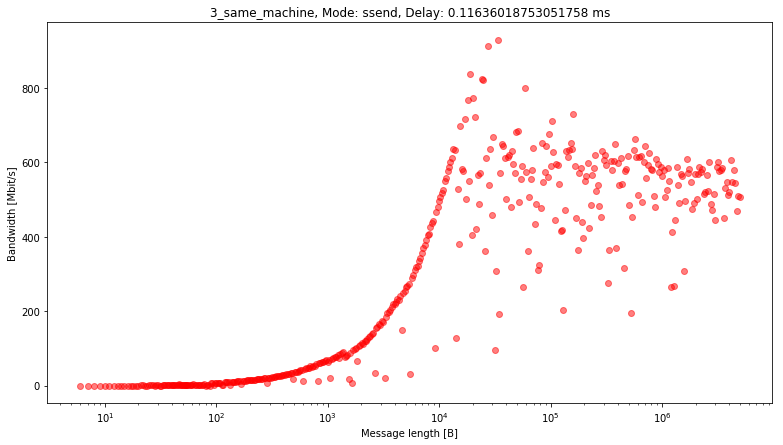

# 4_different_machines

## Mode:send, Delay: 0.08796453475952148 ms

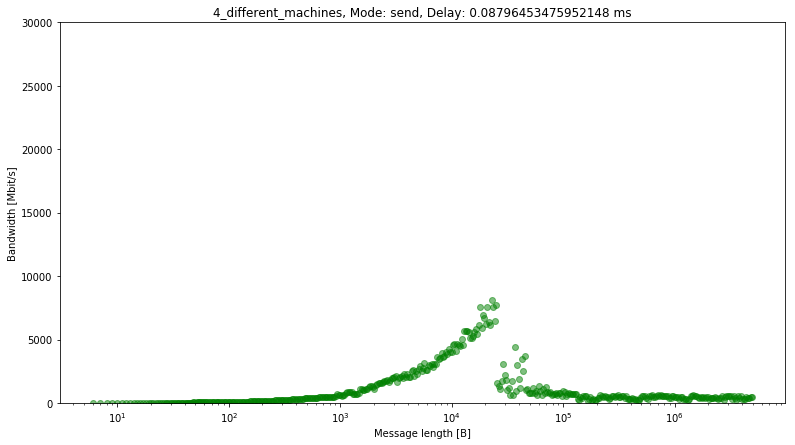

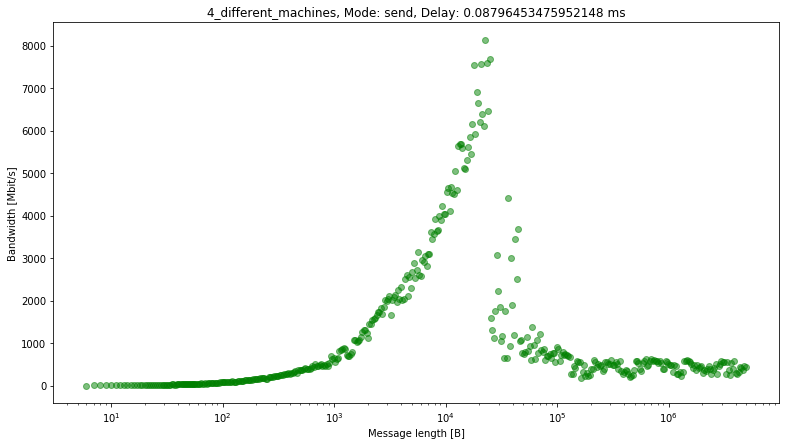

## Mode:ssend, Delay: 0.1861095428466797 ms

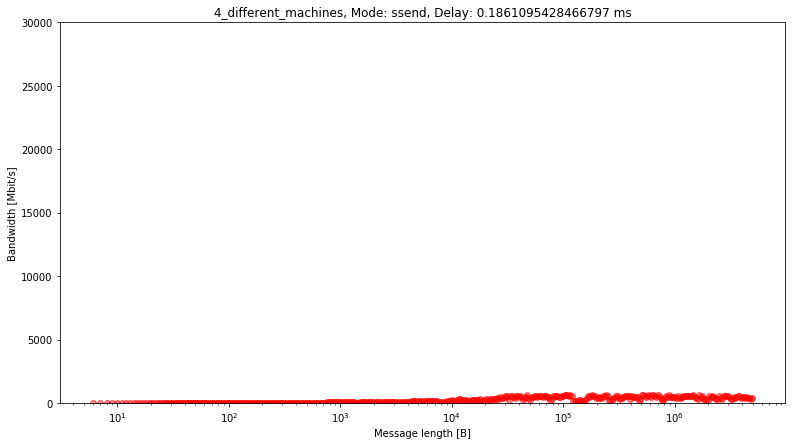

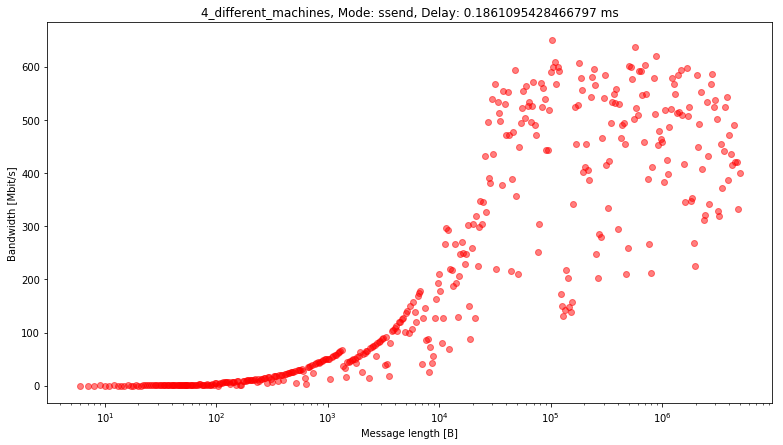

In [6]:
for file_name in files:
    with open(file_name, "r") as f:
        j = json.load(f)
        
        name = re.match(r"^(\w+)\.json$", file_name)[1]
        display(Markdown("# {}".format(name)))
        
        for mode, values in j.items():
            display(Markdown("## Mode:{}, Delay: {} ms".format(mode, values["delay"][0])))
            for scale in (True, False):
                plt.figure(figsize=(13, 7))
                color = "green" if mode == "send" else "red"
                plt.scatter(values["x"], values["y"], alpha=0.5, c=color)

                plot_title = "{}, Mode: {}, Delay: {} ms".format(name, mode, values["delay"][0])
                plt.title(plot_title)
                plt.gca().set_xscale("log")
                if scale:
                    plt.gca().set_ylim([0, 30000])


                plt.xlabel("Message length [B]")
                plt.ylabel("Bandwidth [Mbit/s]")

                plt.show()
        print("\n")
            